# Happiness Around the World: A Comparative Analysis

## World Happiness Report 2019
https://www.kaggle.com/unsdsn/world-happiness

https://www.kaggle.com/unsdsn/world-happiness/2019.csv

* Country or region: Name of countries
* Overall rank: Rank of countries based on the Happiness Score
* Score: A metric measured in 2019 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
* GDP per capita: The extent to which GDP contributes to the calculation of the Happiness Score.
* Social support: The extent to which Social support contributes to the calculation of the Happiness Score
* Healthy life expectancy:  The extent to which Life expectancy contributed to the calculation of the Happiness Score
* Freedom to make life choices:  The extent to which Freedom contributed to the calculation of the Happiness Score
* Generosity: The extent to which Generosity contributed to the calculation of the Happiness Score
* Perceptions of corruption: The extent to which Perception of Corruption contributes to Happiness Score.

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Read data

In [3]:
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# Summary Statistics
To get a summary of the numerical columns in the data, you can use the some function. 

This code defines a function called check_df that takes a DataFrame as input and prints various information about the DataFrame, including its shape, data types, head, tail, missing values, and quantiles.

The function has two parameters: dataframe, which is the DataFrame to be analyzed, and head, which is the number of rows to print for the head and tail of the DataFrame. The default value for head is 5.

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(156, 9)
##################### Types #####################
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object
##################### Head #####################
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy 

The describe method is a function of the Pandas DataFrame class that generates descriptive statistics of a DataFrame.

When you call the describe method on a DataFrame, it returns a new DataFrame that contains various statistical summary measures of the data in the original DataFrame. These summary measures include the count, mean, standard deviation, minimum, maximum, 25th percentile, 50th percentile (also known as the median), and 75th percentile of the data.

In [5]:
# Generate statistics
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
# Overall rank should be removed, it is unnecessary.

df.drop('Overall rank', axis=1, inplace=True)
df.head(3)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [8]:
# Rename columns

df.rename(columns={'Country or region': 'Country', 'Score': 'Happiness Score'}, inplace=True)
df.head(3)

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


## Remove outliers
This code defines a function called remove_outliers that takes a DataFrame and a column name as input and returns a new DataFrame with the outliers in the specified column removed.

The function works by first sorting the DataFrame by the specified column. It then calculates the first quartile (Q1) and third quartile (Q3) of the column, as well as the interquartile range (IQR) which is the difference between Q3 and Q1. The function then calculates the lower and upper range of the column data by adding and subtracting 1.5 * IQR from Q1 and Q3, respectively.

Finally, the function filters the original DataFrame to include only rows where the value in the specified column is within the lower and upper range, and returns the resulting DataFrame.

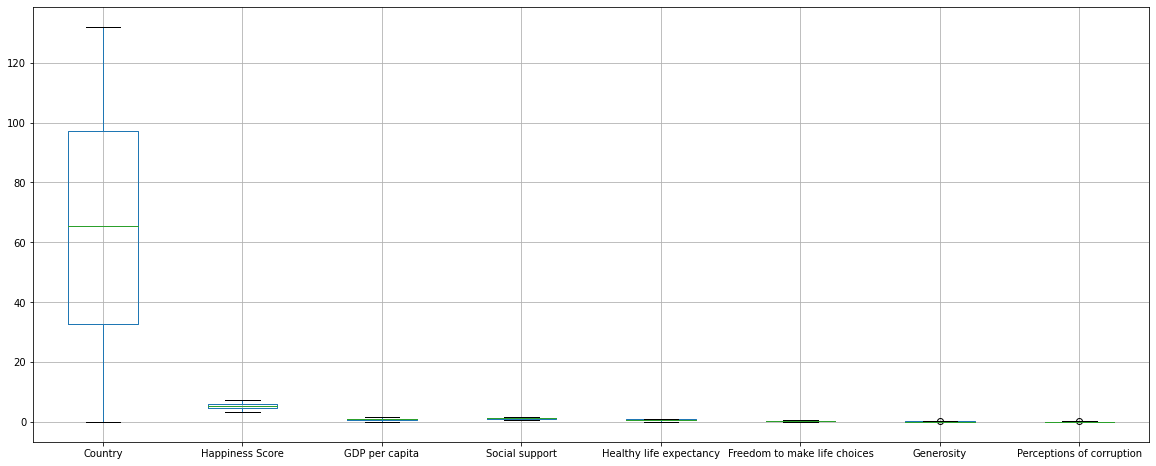

In [33]:
def remove_outliers(df, column):
    sorted(df)
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df = df[(df[column] > lower_range) & (df[column] < upper_range)]
    return df

df = remove_outliers(df, 'GDP per capita')
df = remove_outliers(df, 'Social support')
df = remove_outliers(df, 'Healthy life expectancy')
df = remove_outliers(df, 'Freedom to make life choices')
df = remove_outliers(df, 'Generosity')
df = remove_outliers(df, 'Perceptions of corruption')

# Check if there is any outliers

df.boxplot(figsize=(20, 8))
plt.show()

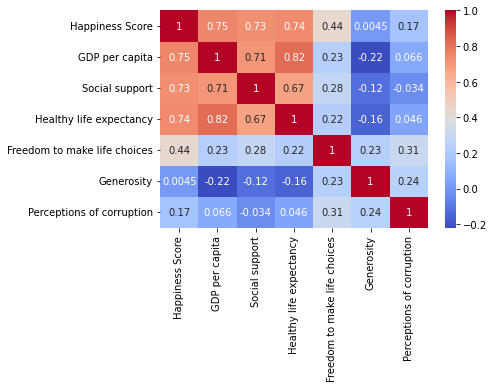

In [10]:
# Correlation matrix

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

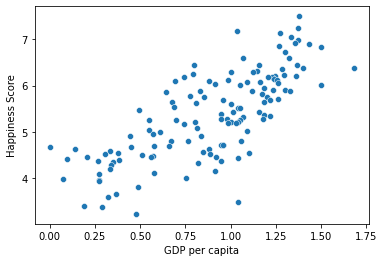

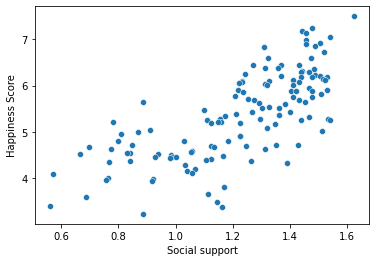

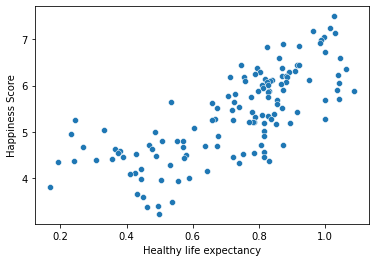

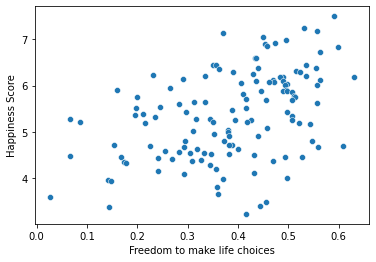

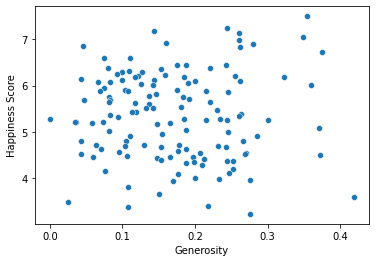

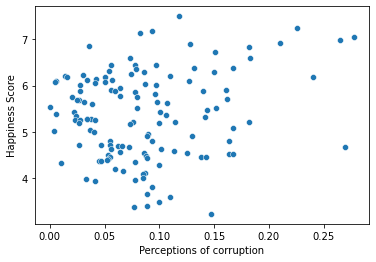

In [12]:
# Scatter plot

sns.scatterplot(x = 'GDP per capita', y = 'Happiness Score', data = df)
plt.show()

sns.scatterplot(x = 'Social support', y = 'Happiness Score', data = df)
plt.show()

sns.scatterplot(x = 'Healthy life expectancy', y = 'Happiness Score', data = df)
plt.show()

sns.scatterplot(x = 'Freedom to make life choices', y = 'Happiness Score', data = df)
plt.show()

sns.scatterplot(x = 'Generosity', y = 'Happiness Score', data = df)
plt.show()

sns.scatterplot(x = 'Perceptions of corruption', y = 'Happiness Score', data = df)
plt.show()

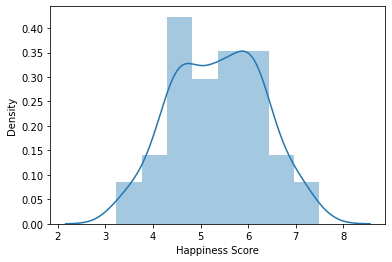

In [14]:
# Histogram

sns.distplot(df['Happiness Score'])
plt.show()

## Barplot

This code uses the Matplotlib and Seaborn libraries to create a bar plot that visualizes the relationship between the Country and Happiness Score columns in the DataFrame df.

The figure function from Matplotlib is used to set the size of the plot, and the barplot function from Seaborn is used to create the bar plot. The x and y parameters specify the variables to use for the x-axis and y-axis, respectively, and the data parameter specifies the DataFrame to use for the plot.

The xticks function from Matplotlib is used to rotate the labels on the x-axis, and the show function is used to display the plot.

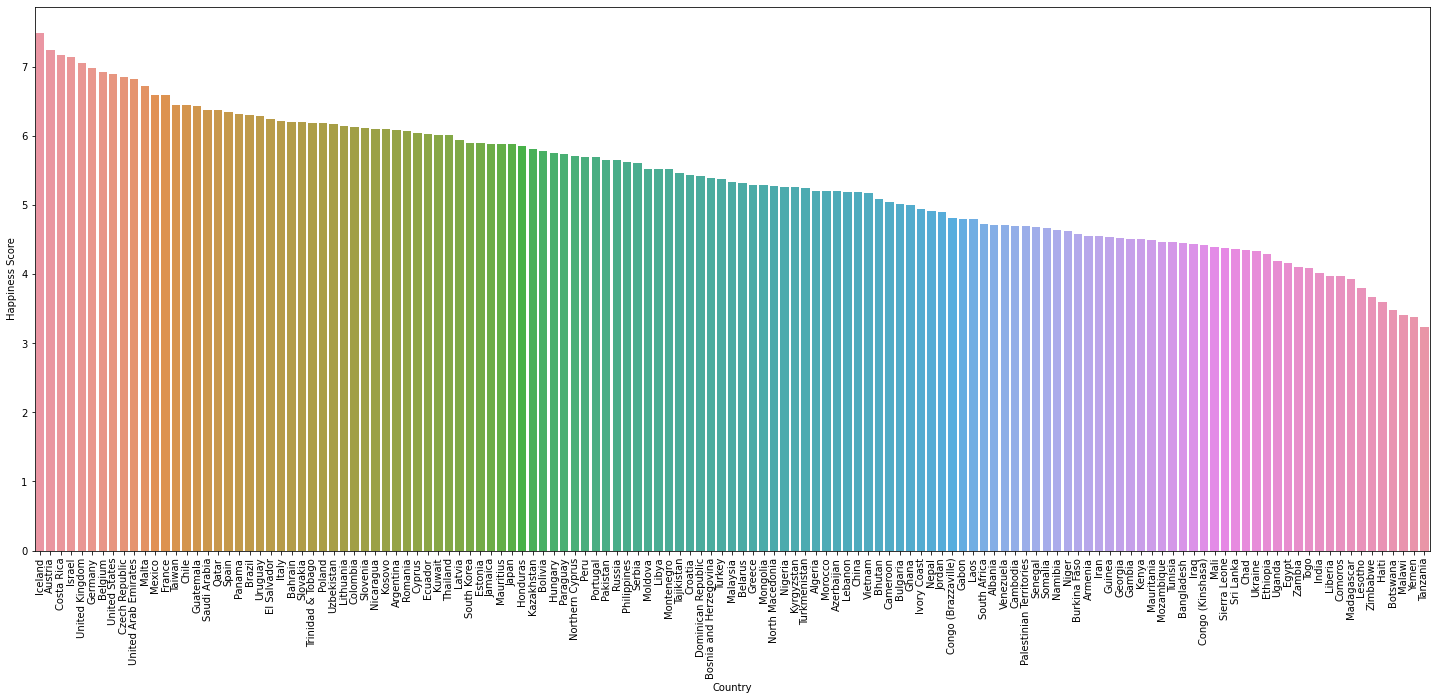

In [17]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Country', y='Happiness Score', data=df)
plt.xticks(rotation=90)
plt.show()

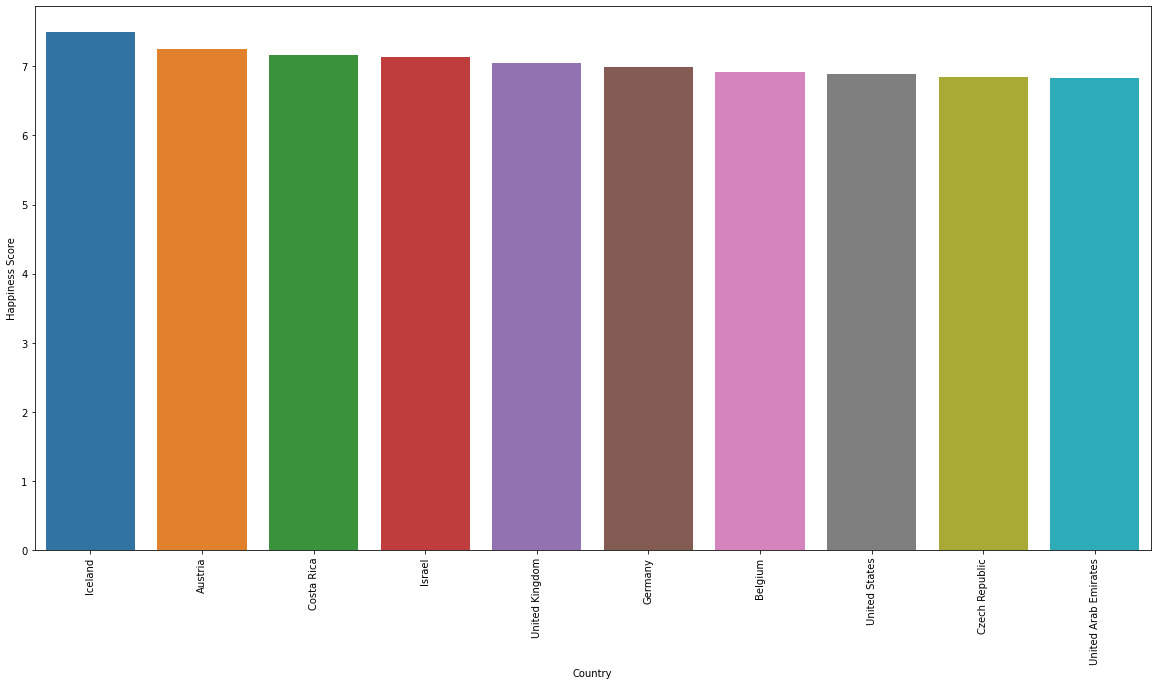

In [18]:
# Top 10 countries with the highest happiness score

top10 = df.sort_values(by = 'Happiness Score', ascending = False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country', y = 'Happiness Score', data = top10)
plt.xticks(rotation = 90)
plt.show()

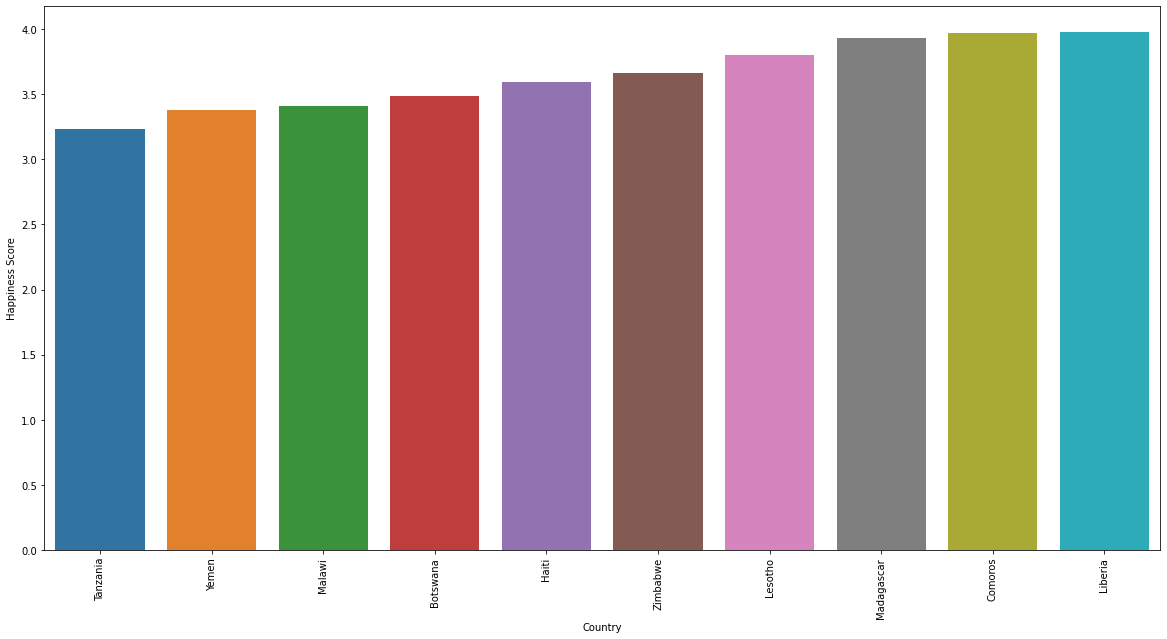

In [20]:
# Top 10 countries with the lowest happiness score

bottom10 = df.sort_values(by = 'Happiness Score', ascending = True).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Country', y = 'Happiness Score', data = bottom10)
plt.xticks(rotation = 90)
plt.show()

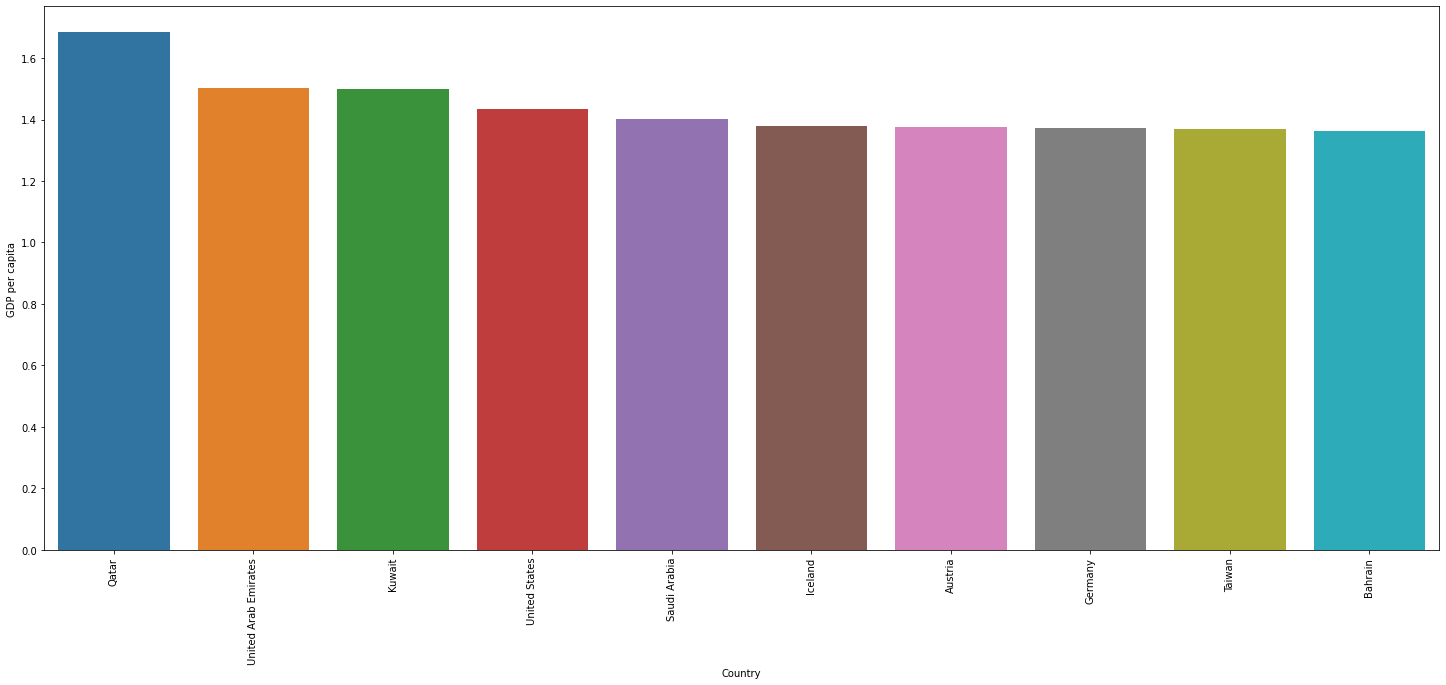

In [21]:
# Top 10 countries with the highest GDP per capita

top10_gdp = df.sort_values(by = 'GDP per capita', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'GDP per capita', data = top10_gdp)
plt.xticks(rotation = 90)
plt.show()

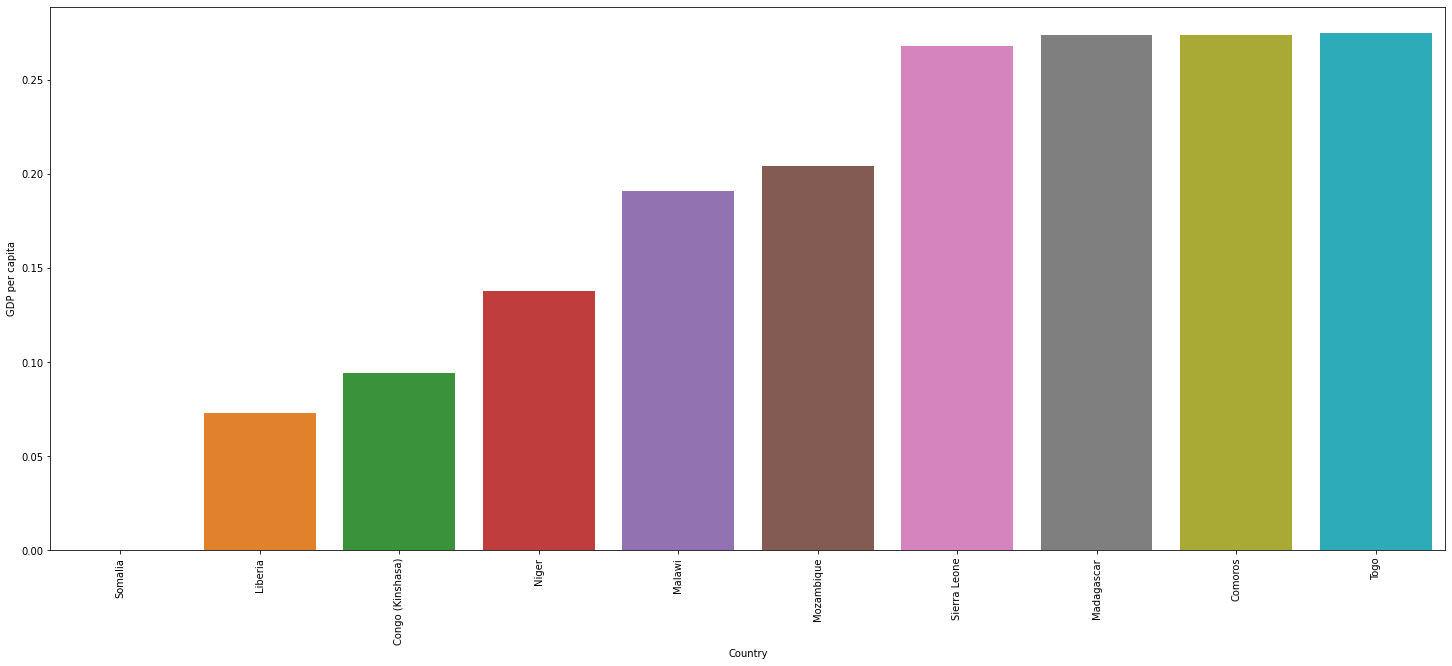

In [22]:
# Top 10 countries with the lowest GDP per capita

bottom10_gdp = df.sort_values(by = 'GDP per capita', ascending = True).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'GDP per capita', data = bottom10_gdp)
plt.xticks(rotation = 90)
plt.show()

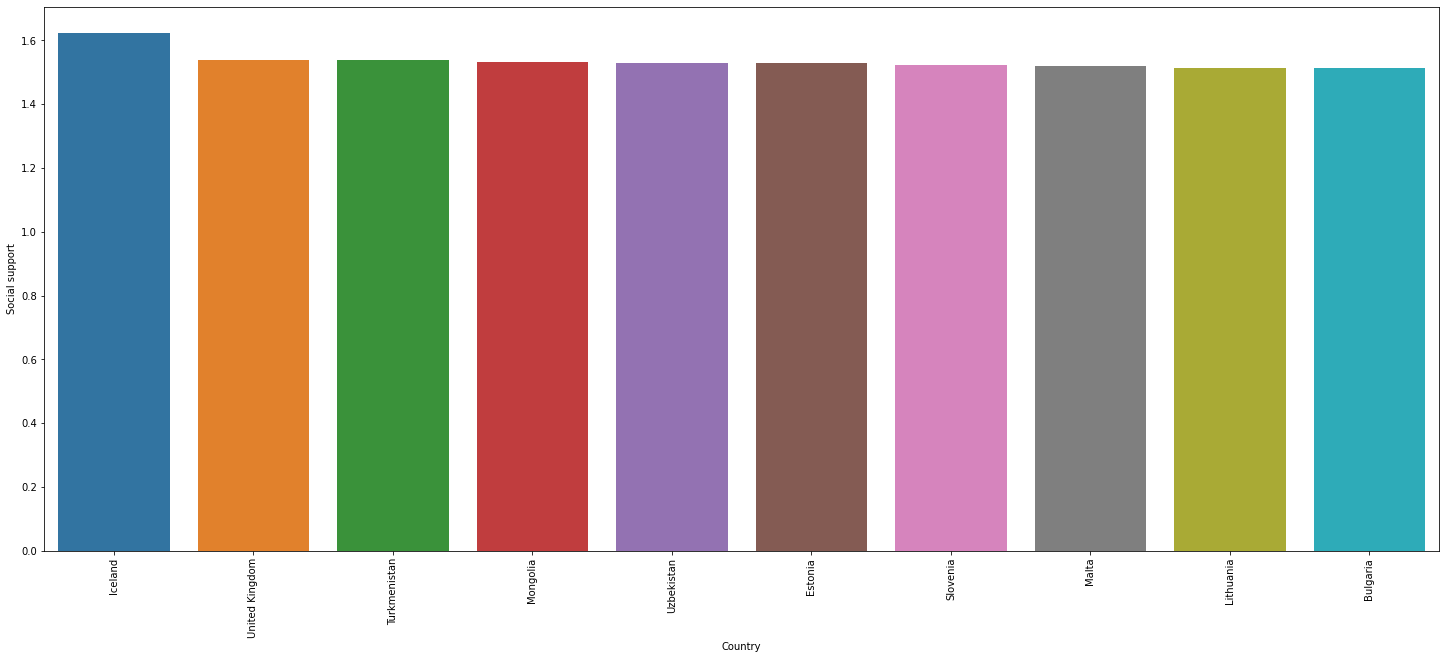

In [23]:
# Top 10 countries with the highest social support

top10_social = df.sort_values(by = 'Social support', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Social support', data = top10_social)
plt.xticks(rotation = 90)
plt.show()

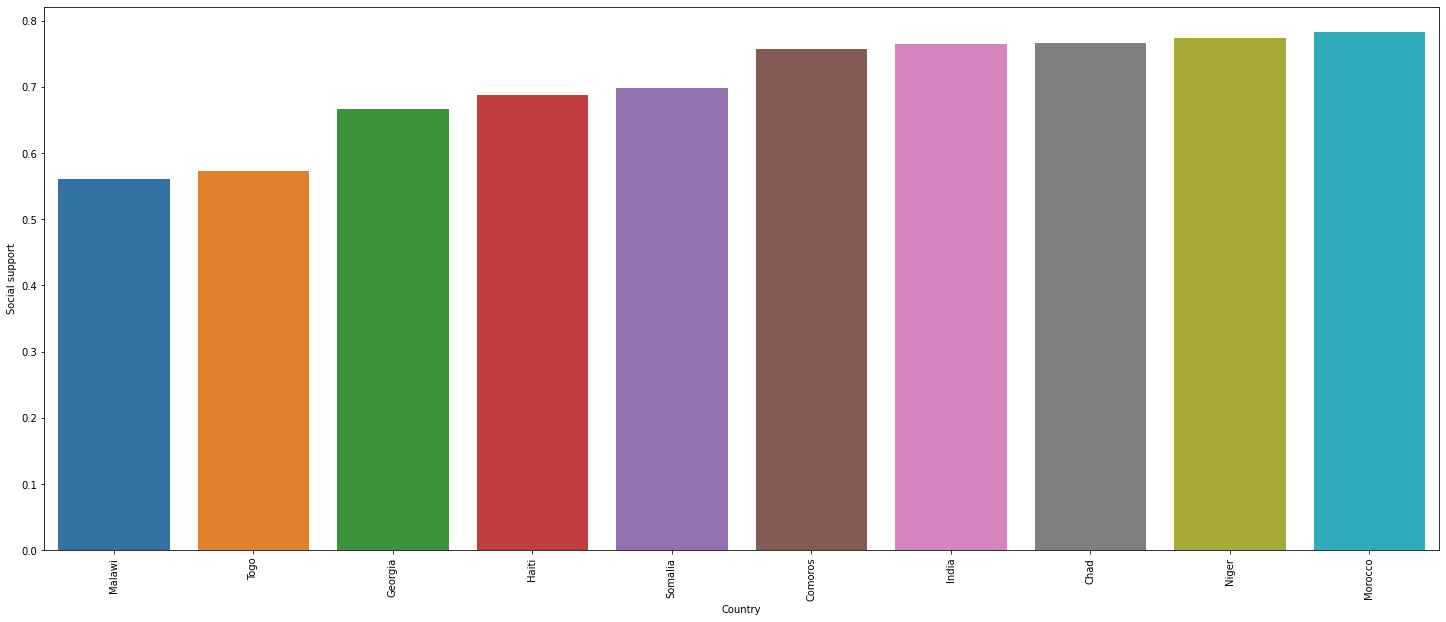

In [24]:
# Top 10 countries with the lowest social support

bottom10_social = df.sort_values(by = 'Social support', ascending = True).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Social support', data = bottom10_social)
plt.xticks(rotation = 90)
plt.show()

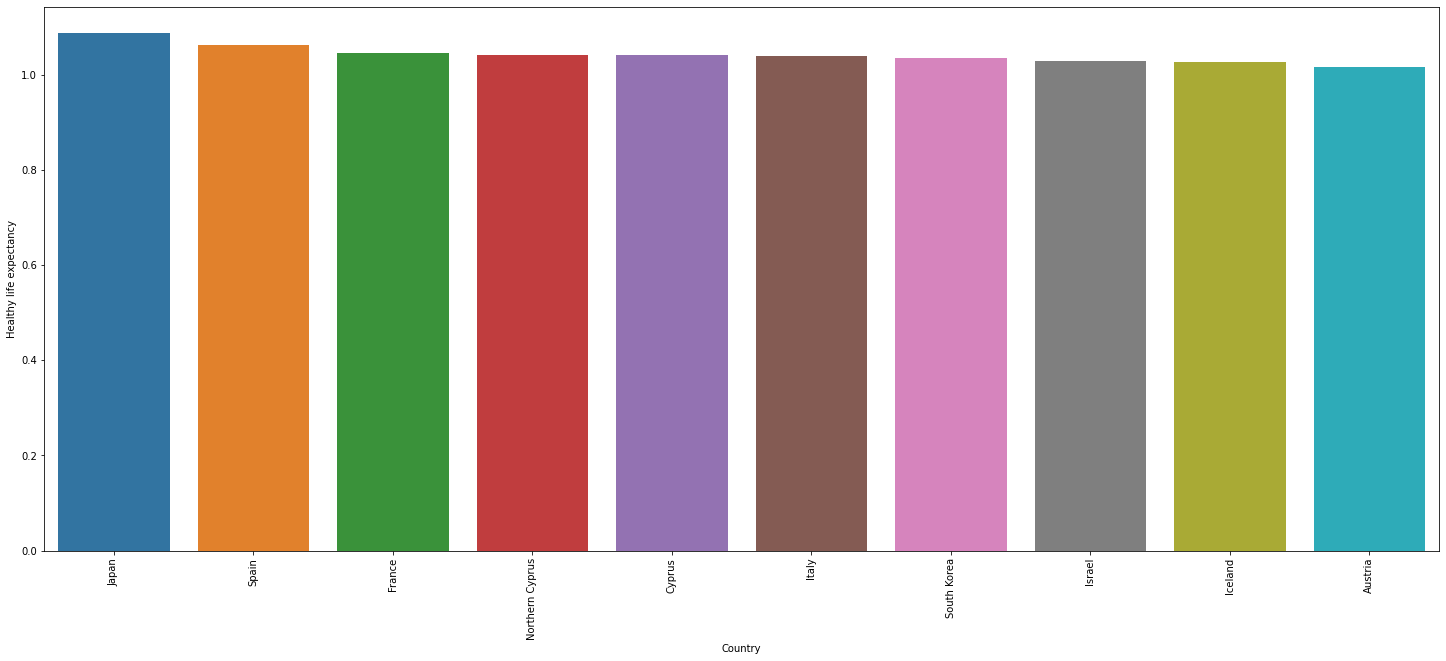

In [25]:
# Top 10 countries with the highest healthy life expectancy

top10_health = df.sort_values(by = 'Healthy life expectancy', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Healthy life expectancy', data = top10_health)
plt.xticks(rotation = 90)
plt.show()

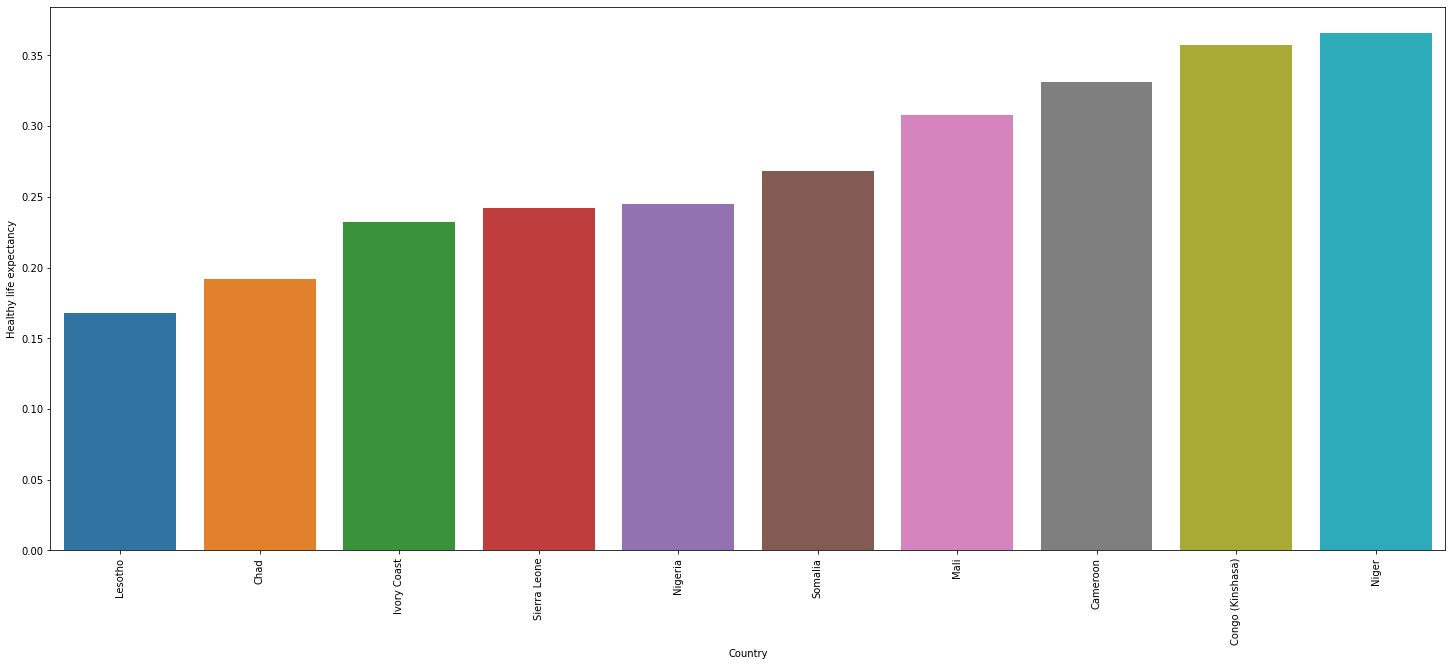

In [26]:
# Top 10 countries with the lowest healthy life expectancy

bottom10_health = df.sort_values(by = 'Healthy life expectancy', ascending = True).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Healthy life expectancy', data = bottom10_health)
plt.xticks(rotation = 90)
plt.show()

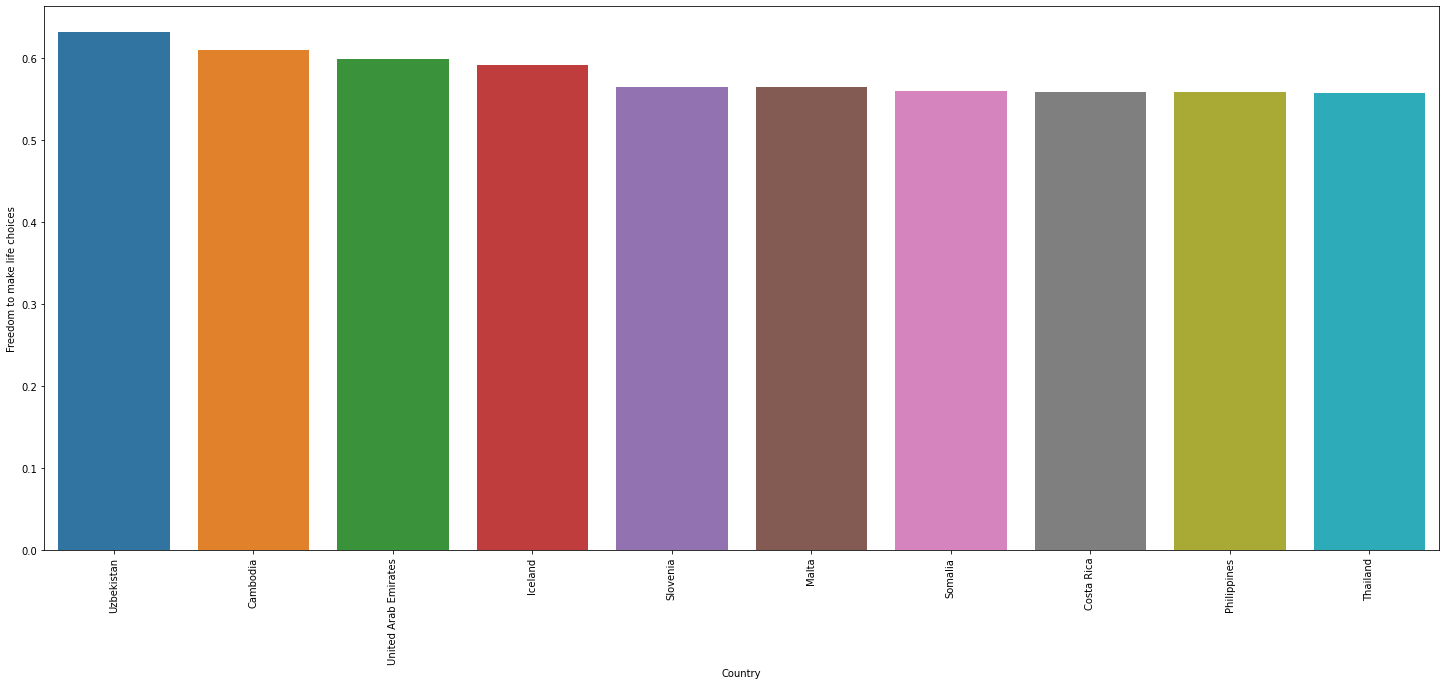

In [27]:
# Top 10 countries with the highest freedom to make life choices

top10_freedom = df.sort_values(by = 'Freedom to make life choices', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Freedom to make life choices', data = top10_freedom)
plt.xticks(rotation = 90)
plt.show()

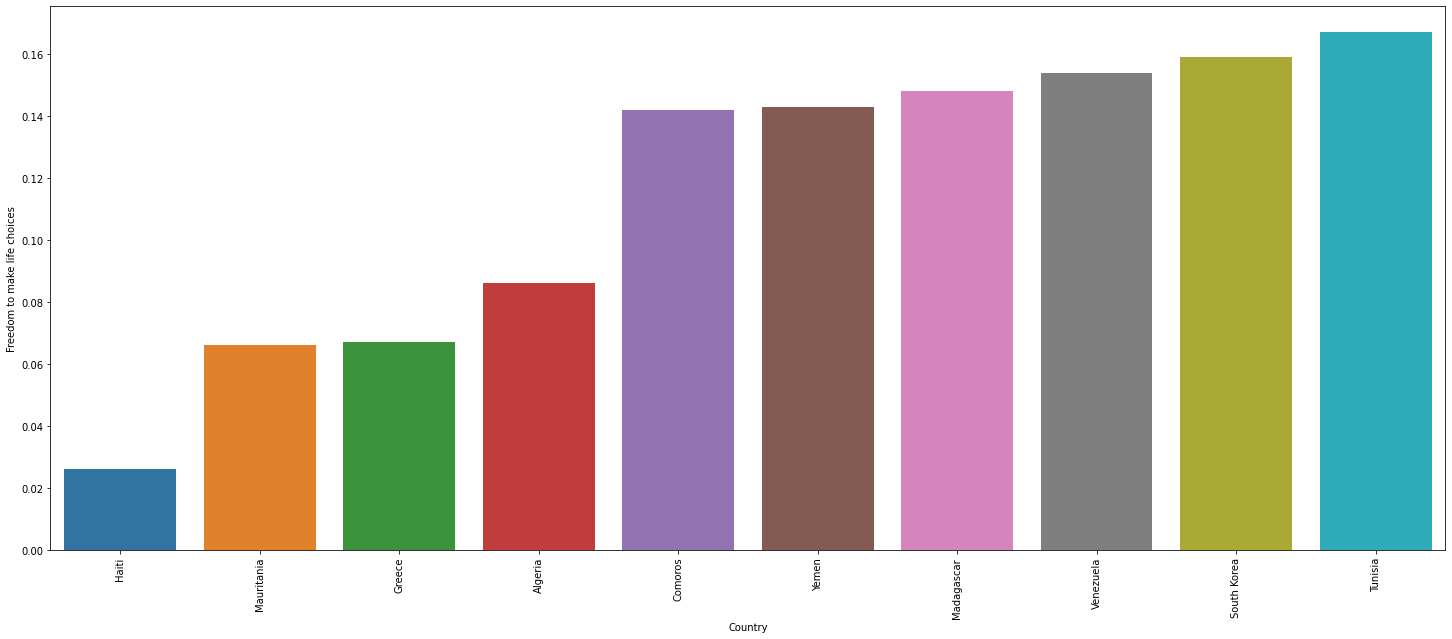

In [28]:
# Top 10 countries with the lowest freedom to make life choices

bottom10_freedom = df.sort_values(by = 'Freedom to make life choices', ascending = True).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Freedom to make life choices', data = bottom10_freedom)
plt.xticks(rotation = 90)
plt.show()

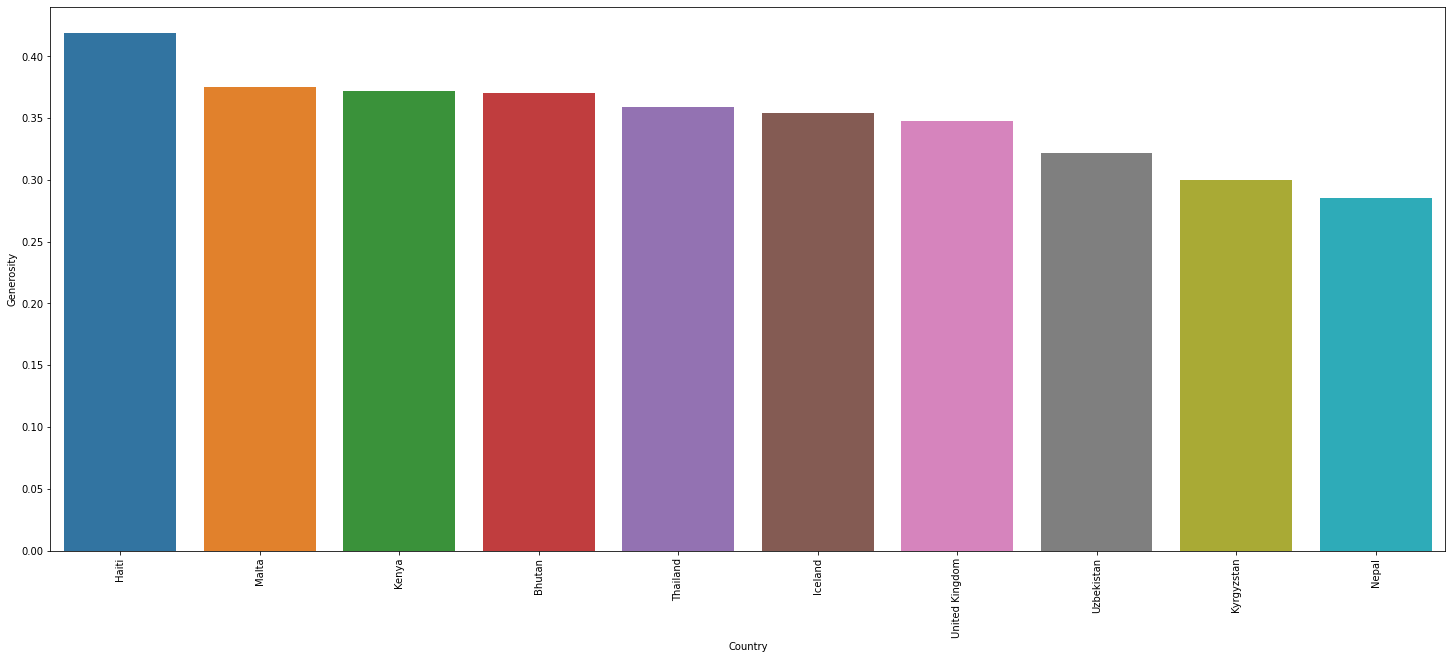

In [29]:
# Top 10 countries with the highest generosity

top10_generosity = df.sort_values(by = 'Generosity', ascending = False).head(10)
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Country', y = 'Generosity', data = top10_generosity)
plt.xticks(rotation = 90)
plt.show()

This code uses the train_test_split function from the sklearn.model_selection module to split a dataset into a training set and a test set. The X variable contains the features of the dataset, and the y variable contains the target values. The train_test_split function takes the features and target values as input, along with the test size (in this case, 20% of the data is used for the test set) and a random seed (to ensure reproducibility).

The StandardScaler class from the sklearn.preprocessing module is then used to perform feature scaling on the training and test sets. Feature scaling is a technique used to standardize the range of independent variables or features of data. It is important to scale the features in a machine learning model to ensure that no single feature dominates the others and to avoid any bias in the model.

To use the StandardScaler, an instance of the class is first created and then fit to the training set using the fit_transform method. The resulting transformed data is stored in X_train. The transform method is then used to apply the same transformation to the test set, and the resulting transformed data is stored in X_test.

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and target
X = df.drop(['Country', 'Happiness Score'], axis=1)
y = df['Happiness Score']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Building

This code imports several classes from the xgboost, sklearn.linear_model, sklearn.tree, sklearn.ensemble, and sklearn.ensemble modules, which are commonly used for building regression models in Python.

* The XGBRegressor class from the xgboost library is a gradient boosting model that uses decision trees as its base learners. It is a popular choice for building regression models because of its good performance and ability to handle large datasets efficiently.

* The LinearRegression class from the sklearn.linear_model module is a simple linear regression model that fits a linear equation to the data. It is a good choice for modeling linear relationships between variables.

* The DecisionTreeRegressor class from the sklearn.tree module is a decision tree model that splits the data into groups based on the value of a feature. It is a good choice for modeling non-linear relationships between variables.

* The RandomForestRegressor class from the sklearn.ensemble module is an ensemble model that combines multiple decision trees and averages their predictions. It is a good choice for improving the performance of a decision tree model and reducing overfitting.

* The GradientBoostingRegressor class from the sklearn.ensemble module is another gradient boosting model that uses decision trees as its base learners. It is similar to the XGBRegressor class, but has more options for model tuning and is slower to train.

* The AdaBoostRegressor class from the sklearn.ensemble module is an ensemble model that combines multiple weak models and weights their predictions to make a final prediction. It is a good choice for improving the performance of a simple model.

In [51]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

This code creates an instance of the LinearRegression class from the sklearn.linear_model module and uses it to fit a linear regression model to the training data.

The fit method is used to fit the model to the training data, and the predict method is used to make predictions on the test data. The score method is used to evaluate the model's performance on the test data. The performance metric used by the score method depends on the type of model being used. For a linear regression model, the score method returns the coefficient of determination (R^2) of the prediction.

The resulting model performance is then printed to the console using the print function.

In [63]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, y_test)
print('Linear Regression Score: ', lr_score)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print('Decision Tree Score: ', dt_score)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('Random Forest Score: ', rf_score)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_score = xgb.score(X_test, y_test)
print('XGBoost Score: ', xgb_score)

# RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('RandomForestRegressor Score: ', rf_score)

# GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
gb_score = gb.score(X_test, y_test)
print('GradientBoostingRegressor Score: ', gb_score)

# AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_score = ada.score(X_test, y_test)
print('AdaBoostRegressor Score: ', ada_score)

# KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print('KNeighborsRegressor Score: ', knn_score)

Linear Regression Score:  0.6841216592604057
Decision Tree Score:  0.28616030271278814
Random Forest Score:  0.69443250417991
XGBoost Score:  0.5981049248655365
RandomForestRegressor Score:  0.7092322318852047
GradientBoostingRegressor Score:  0.6715963944352763
AdaBoostRegressor Score:  0.6841751067060653
KNeighborsRegressor Score:  0.6816380800543443


# Model Evaluation

Evaluating a model's performance is an important step in any data analysis or machine learning project. There are many different ways to evaluate a model's performance, depending on the specific problem you are trying to solve and the type of model you are using.

For example, if you are working on a classification problem (e.g. predicting whether someone is happy or not), you might use evaluation metrics such as accuracy, precision, recall, and F1 score to measure how well your model is performing.

On the other hand, if you are working on a regression problem (e.g. predicting happiness on a continuous scale), you might use evaluation metrics such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) to measure the model's performance.

To evaluate a model's performance, you will typically split your data into a training set and a test set. You will train your model on the training set and then use the test set to evaluate the model's performance. This helps ensure that the model is not overfitting to the training data and can generalize well to new data.

It is also important to consider the context of your analysis and the goals of your model. For example, if you are trying to predict happiness around the world, you might want to consider factors such as cultural differences and the impact of specific events on happiness levels. You might also want to consider using multiple evaluation metrics to get a more comprehensive view of the model's performance.

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

The code you provided will evaluate the performance of a linear regression model using four different evaluation metrics: mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R2 score.

***Here is a brief explanation of each metric:***

* Mean squared error (MSE) is a measure of the average squared difference between the predicted values and the true values. It is calculated by taking the sum of the squared differences and dividing by the number of samples. Lower values of MSE indicate a better fit.

* Root mean squared error (RMSE) is the square root of the MSE. It is a measure of the average magnitude of the error. Lower values of RMSE indicate a better fit.

* Mean absolute error (MAE) is a measure of the average magnitude of the error. It is calculated by taking the absolute value of the difference between the predicted values and the true values and averaging over all samples. Lower values of MAE indicate a better fit.

* R2 score (also known as the coefficient of determination) is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, with higher values indicating a better fit. An R2 score of 1 indicates that the model perfectly explains the variance in the dependent variable.

In [59]:
# Linear Regression
print('Linear Regression')
print('Mean Squared Error:', mean_squared_error(y_test, lr_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, lr_pred))
print('R2 Score:', r2_score(y_test, lr_pred))

print('*************************')

# Decision Tree
print('Decision Tree')
print('Mean Squared Error:', mean_squared_error(y_test, dt_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, dt_pred))
print('R2 Score:', r2_score(y_test, dt_pred))

print('*************************')

# Random Forest
print('Random Forest')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

print('*************************')

# XGBoost
print('XGBoost')
print('Mean Squared Error:', mean_squared_error(y_test, xgb_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, xgb_pred))
print('R2 Score:', r2_score(y_test, xgb_pred))

print('*************************')  # Add a newline between the output for the two models

# RandomForestRegressor
print('RandomForestRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, rf_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_pred))
print('R2 Score:', r2_score(y_test, rf_pred))

print('*************************')

# GradientBoostingRegressor
print('GradientBoostingRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, gb_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gb_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_pred))
print('R2 Score:', r2_score(y_test, gb_pred))

print('*************************')

# AdaBoostRegressor
print('AdaBoostRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, ada_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, ada_pred))
print('R2 Score:', r2_score(y_test, ada_pred))

print('*************************')

# KNeighborsRegressor
print('KNeighborsRegressor')
print('Mean Squared Error:', mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn_pred))
print('R2 Score:', r2_score(y_test, knn_pred))

Linear Regression
Mean Squared Error: 0.3029439735952702
Root Mean Squared Error: 0.5504034643743353
Mean Absolute Error: 0.42688322026284425
R2 Score: 0.6841216592604057
*************************
Decision Tree
Mean Squared Error: 0.5624305769230769
Root Mean Squared Error: 0.7499537165206109
Mean Absolute Error: 0.5437307692307694
R2 Score: 0.41355612619967286
*************************
Random Forest
Mean Squared Error: 0.2824164245730768
Root Mean Squared Error: 0.5314286636728177
Mean Absolute Error: 0.38225346153846146
R2 Score: 0.7055256437913671
*************************
XGBoost
Mean Squared Error: 0.38543855442742897
Root Mean Squared Error: 0.6208369789465097
Mean Absolute Error: 0.5258417670910175
R2 Score: 0.5981049248655365
*************************
RandomForestRegressor
Mean Squared Error: 0.2824164245730768
Root Mean Squared Error: 0.5314286636728177
Mean Absolute Error: 0.38225346153846146
R2 Score: 0.7055256437913671
*************************
GradientBoostingRegressor
Mea

# Model Tuning

Model tuning, also known as hyperparameter optimization or hyperparameter tuning, refers to the process of finding the best values for the hyperparameters of a machine learning model. Hyperparameters are parameters that are set before the model is trained and are not learned from the data during training. They control the model's behavior and can significantly impact its performance.

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Random Forest
rf_params = {"max_depth": [3, 5, 8, None],
                "max_features": [3, 5, 10],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 3, 5, 10],
                "bootstrap": [True, False],
                "n_estimators": [100, 500, 1000],
                "random_state": [42]}
rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2)
rf_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(rf_cv_model.best_params_))

# GradientBoostingRegressor
gb_params = {"learning_rate": [0.01, 0.1, 0.05],
                "max_depth": [3, 5, 8],
                "max_features": [3, 5, 10],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 3, 5, 10],
                "n_estimators": [100, 500, 1000],
                "subsample": [1, 0.5, 0.75],
                "random_state": [42]}
gb_cv_model = GridSearchCV(gb, gb_params, cv=5, n_jobs=-1, verbose=2)
gb_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(gb_cv_model.best_params_))

# AdaBoostRegressor
ada_params = {"learning_rate": [0.01, 0.1, 0.05],
                "n_estimators": [100, 500, 1000],
                "random_state": [42]}
ada_cv_model = GridSearchCV(ada, ada_params, cv=5, n_jobs=-1, verbose=2)
ada_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(ada_cv_model.best_params_))

# KNeighborsRegressor
knn_params = {"n_neighbors": np.arange(1, 50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=2)
knn_cv_model.fit(X_train, y_train)
print("Best Parameters: " + str(knn_cv_model.best_params_))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42; total time=   2.3s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max

# Model Comparison

In [67]:
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model)
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('---------------------------------------------------')

RandomForestRegressor()
Mean Squared Error: 0.2892094872846152
Root Mean Squared Error: 0.5377820072153914
Mean Absolute Error: 0.39066615384615405
R2 Score: 0.6984425473613733
---------------------------------------------------
GradientBoostingRegressor()
Mean Squared Error: 0.31686866643486644
Root Mean Squared Error: 0.5629108867617204
Mean Absolute Error: 0.44874855982340944
R2 Score: 0.6696024436533756
---------------------------------------------------
AdaBoostRegressor()
Mean Squared Error: 0.29817323290920117
Root Mean Squared Error: 0.5460524085737569
Mean Absolute Error: 0.3969715415454
R2 Score: 0.6890960894632248
---------------------------------------------------
KNeighborsRegressor()
Mean Squared Error: 0.30532585692307673
Root Mean Squared Error: 0.5525629890999547
Mean Absolute Error: 0.3932692307692307
R2 Score: 0.6816380800543443
---------------------------------------------------


In [72]:
# Random Forest
rf_tuned = RandomForestRegressor(bootstrap=False, max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42)
rf_tuned.fit(X_train, y_train)
rf_tuned_pred = rf_tuned.predict(X_test)
print('Random Forest Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, rf_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_tuned_pred))
print('R2 Score:', r2_score(y_test, rf_tuned_pred))

# GradientBoostingRegressor
gb_tuned = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, max_features=5, min_samples_leaf=1, min_samples_split=2, n_estimators=1000, random_state=42, subsample=1)
gb_tuned.fit(X_train, y_train)
gb_tuned_pred = gb_tuned.predict(X_test)
print('GradientBoostingRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, gb_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gb_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_tuned_pred))
print('R2 Score:', r2_score(y_test, gb_tuned_pred))

# AdaBoostRegressor
ada_tuned = AdaBoostRegressor(learning_rate=0.01, n_estimators=1000, random_state=42)
ada_tuned.fit(X_train, y_train)
ada_tuned_pred = ada_tuned.predict(X_test)
print('AdaBoostRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, ada_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, ada_tuned_pred))
print('R2 Score:', r2_score(y_test, ada_tuned_pred))

# KNeighborsRegressor
knn_tuned = KNeighborsRegressor(n_neighbors=3)
knn_tuned.fit(X_train, y_train)
knn_tuned_pred = knn_tuned.predict(X_test)
print('KNeighborsRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, knn_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn_tuned_pred))
print('R2 Score:', r2_score(y_test, knn_tuned_pred))

Random Forest Tuned
Mean Squared Error: 0.45508467626236465
Root Mean Squared Error: 0.6745996414632642
Mean Absolute Error: 0.4930034936591129
R2 Score: 0.5254852218125935
GradientBoostingRegressor Tuned
Mean Squared Error: 0.29546406657813795
Root Mean Squared Error: 0.5435660645939351
Mean Absolute Error: 0.4266534944405497
R2 Score: 0.6919209252085536
AdaBoostRegressor Tuned
Mean Squared Error: 0.284297692788161
Root Mean Squared Error: 0.5331957359058314
Mean Absolute Error: 0.385970685031292
R2 Score: 0.7035640537481176
KNeighborsRegressor Tuned
Mean Squared Error: 0.4097848888888888
Root Mean Squared Error: 0.6401444281479679
Mean Absolute Error: 0.4633589743589744
R2 Score: 0.5727191096551916


# Model Saving

The pickle.dump() function is used to serialize an object hierarchy and write it to a file.

The first argument to pickle.dump() is the object you want to serialize, and the second argument is a file-like object, such as a file opened in write mode using the open() function. In your code, you are creating new files with the names 'rf_tuned.pkl', 'gb_tuned.pkl', 'ada_tuned.pkl', and 'knn_tuned.pkl' and opening them in write mode ('wb') before passing them to pickle.dump().

By serializing the models and saving them to files, you can later load them using the pickle.load() function and use them to make predictions or perform other operations. This can be useful if you want to use the models in a different script or after your Python interpreter has been closed.

In [73]:
import pickle

pickle.dump(rf_tuned, open('rf_tuned.pkl', 'wb'))
pickle.dump(gb_tuned, open('gb_tuned.pkl', 'wb'))
pickle.dump(ada_tuned, open('ada_tuned.pkl', 'wb'))
pickle.dump(knn_tuned, open('knn_tuned.pkl', 'wb'))

# Model Loading

The pickle module is a part of the Python Standard Library and provides a way to serialize and deserialize Python objects. The pickle.load() function is used to deserialize a pickled object hierarchy stored in a file, which you can then use to make predictions or perform other operations with the model.

In [74]:
import pickle

rf_tuned = pickle.load(open('rf_tuned.pkl', 'rb'))
gb_tuned = pickle.load(open('gb_tuned.pkl', 'rb'))
ada_tuned = pickle.load(open('ada_tuned.pkl', 'rb'))
knn_tuned = pickle.load(open('knn_tuned.pkl', 'rb'))

# Model Testing

In [75]:
# Random Forest
rf_tuned_pred = rf_tuned.predict(X_test)
print('Random Forest Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, rf_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rf_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, rf_tuned_pred))
print('R2 Score:', r2_score(y_test, rf_tuned_pred))

# GradientBoostingRegressor
gb_tuned_pred = gb_tuned.predict(X_test)
print('GradientBoostingRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, gb_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, gb_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, gb_tuned_pred))
print('R2 Score:', r2_score(y_test, gb_tuned_pred))

# AdaBoostRegressor
ada_tuned_pred = ada_tuned.predict(X_test)
print('AdaBoostRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, ada_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ada_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, ada_tuned_pred))
print('R2 Score:', r2_score(y_test, ada_tuned_pred))

# KNeighborsRegressor
knn_tuned_pred = knn_tuned.predict(X_test)
print('KNeighborsRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(y_test, knn_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, knn_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn_tuned_pred))
print('R2 Score:', r2_score(y_test, knn_tuned_pred))

Random Forest Tuned
Mean Squared Error: 0.45508467626236465
Root Mean Squared Error: 0.6745996414632642
Mean Absolute Error: 0.4930034936591129
R2 Score: 0.5254852218125935
GradientBoostingRegressor Tuned
Mean Squared Error: 0.29546406657813795
Root Mean Squared Error: 0.5435660645939351
Mean Absolute Error: 0.4266534944405497
R2 Score: 0.6919209252085536
AdaBoostRegressor Tuned
Mean Squared Error: 0.284297692788161
Root Mean Squared Error: 0.5331957359058314
Mean Absolute Error: 0.385970685031292
R2 Score: 0.7035640537481176
KNeighborsRegressor Tuned
Mean Squared Error: 0.4097848888888888
Root Mean Squared Error: 0.6401444281479679
Mean Absolute Error: 0.4633589743589744
R2 Score: 0.5727191096551916


# Model Visualization

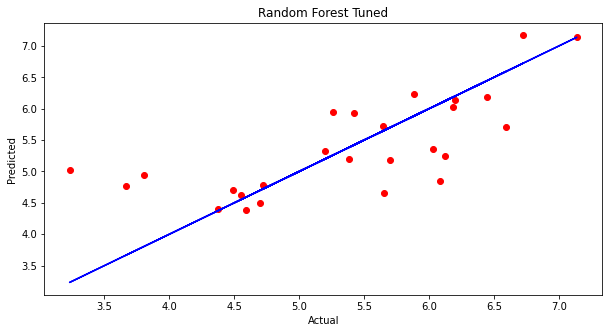

In [76]:
# Random Forest
rf_tuned_pred = rf_tuned.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_tuned_pred, color='red')
plt.plot(y_test, y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Tuned')
plt.show()

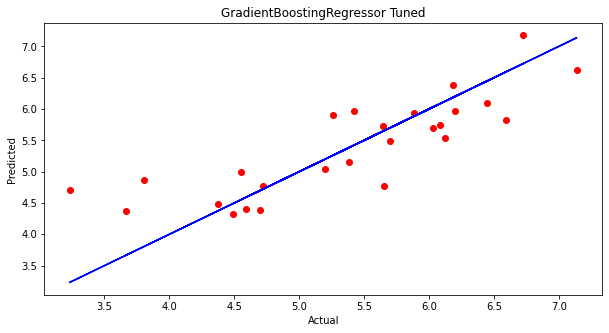

In [77]:
# GradientBoostingRegressor
gb_tuned_pred = gb_tuned.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, gb_tuned_pred, color='red')
plt.plot(y_test, y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('GradientBoostingRegressor Tuned')
plt.show()

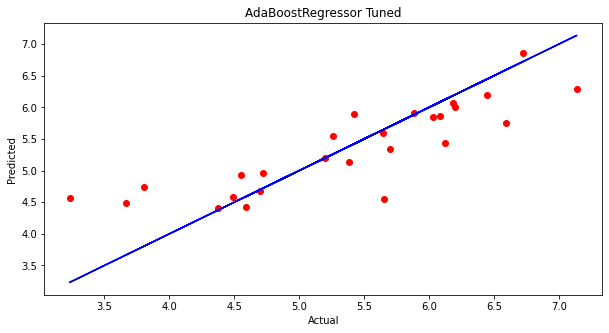

In [78]:
# AdaBoostRegressor
ada_tuned_pred = ada_tuned.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, ada_tuned_pred, color='red')
plt.plot(y_test, y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('AdaBoostRegressor Tuned')
plt.show()

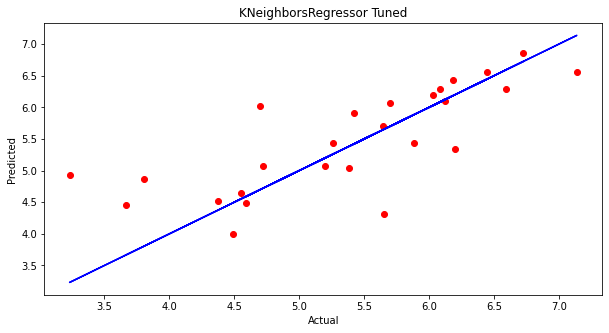

In [79]:
# KNeighborsRegressor
knn_tuned_pred = knn_tuned.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, knn_tuned_pred, color='red')
plt.plot(y_test, y_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNeighborsRegressor Tuned')
plt.show()

# Conclusion

We have the results of some final model evaluations for four different models: a random forest model (rf_tuned), a gradient boosting regressor model (gb_tuned), an AdaBoost regressor model (ada_tuned), and a K-nearest neighbors regressor model (knn_tuned).

For each model, the results include several evaluation metrics: mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R2 score.

The MSE is a measure of the average squared difference between the predicted values and the true values. A lower MSE indicates that the model is making more accurate predictions. The RMSE is the square root of the MSE, which gives the error in the same units as the target variable. The MAE is the average absolute difference between the predicted values and the true values. A lower MAE indicates that the model is making more accurate predictions.

The R2 score, also known as the coefficient of determination, is a measure of how well the model explains the variance in the target variable. It ranges from 0 to 1, with a higher score indicating a better fit.

Looking at the results, it appears that the gradient boosting regressor model (gb_tuned) and the AdaBoost regressor model (ada_tuned) have the lowest MSE and RMSE, indicating that they are making more accurate predictions on average. The gradient boosting regressor model also has the highest R2 score, indicating that it is the best at explaining the variance in the target variable.

> 🌸 Thanks for reading this article. Happy coding! Please feel free to contact me if you need any further information. 🌸